In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.sample(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
18,18,04/21/2012,İzmir,Big Cities,IL,4,5.0,4.0,3.0,1,...,3.0,3,5,5,4,4,4,3,2,5337526.0
100,100,09/21/2007,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9652350.0
90,90,08/08/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,2,...,7.5,0,0,0,0,0,0,0,0,3426169.0
40,40,02/09/2011,İstanbul,Big Cities,IL,3,5.0,4.0,4.0,2,...,2.0,5,5,3,3,3,4,3,2,6836483.0
95,95,06/08/2012,Samsun,Other,FC,2,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,1270499.0


In [4]:
profile = train.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Rest_Rev_pandas_profiling.html")

In [5]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


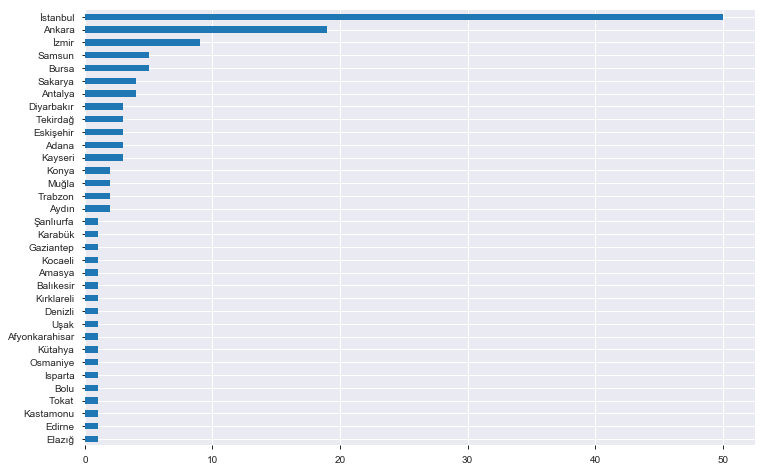

In [6]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8))

pd.value_counts(train['City']).plot(kind='barh').invert_yaxis()

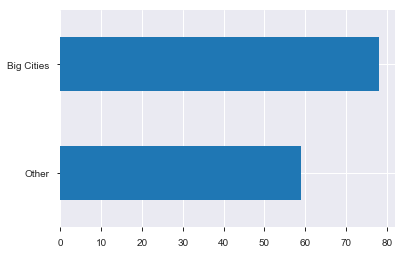

In [7]:
pd.value_counts(train.iloc[:,3]).plot(kind='barh').invert_yaxis()

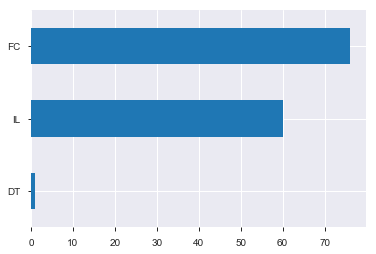

In [8]:
pd.value_counts(train.iloc[:,4]).plot(kind='barh').invert_yaxis()

In [10]:
# drop_list: list of all the column names that are to be dropped based on the insights gained from the EDA profile
drop_list=['Id', "Open_Date", 'City', 'P9', 'P12', 'P13', 'P16', 'P18', 'P25', 'P26', 'P31', 'P32', 'P34', 'P35', 'P36']

train.drop(drop_list, axis=1, inplace=True)
train.sample(5)

,City_Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P27,P28,P29,P30,P33,P37,revenue
94,Other,FC,2,3.0,4.0,4.0,2,2,5,5,...,2,1,5,5.0,1.0,3.0,4,4,5,3753720.0
61,Big Cities,FC,12,7.5,6.0,6.0,4,6,10,8,...,2,5,0,0.0,7.5,5.0,0,0,0,4350573.0
78,Big Cities,IL,9,7.5,6.0,7.5,8,6,10,10,...,2,10,4,2.5,7.5,2.5,20,4,2,3871344.0
134,Other,FC,3,4.0,4.0,4.0,2,3,5,5,...,2,2,0,0.0,2.0,3.0,0,0,0,2544857.0
13,Big Cities,FC,4,5.0,4.0,4.0,1,3,5,5,...,2,1,0,0.0,3.0,3.0,0,0,0,4807746.0


In [11]:
cat_feat = pd.get_dummies(train[['City_Group', 'Type']], drop_first=True)

In [12]:
cat_feat.sample(5)

,City_Group_Other,Type_FC,Type_IL
35,1,0,1
119,0,0,1
3,1,0,1
85,0,1,0
128,0,1,0


In [13]:
train = pd.concat([train, cat_feat], axis=1)
train.drop(labels=['City_Group', 'Type'], axis=1, inplace=True)
train.sample(5)

,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,...,P27,P28,P29,P30,P33,P37,revenue,City_Group_Other,Type_FC,Type_IL
71,12,7.5,6.0,6.0,2,10,10,10,10,4,...,10.0,10.0,7.5,5,6,6,4136425.0,0,0,1
12,2,2.0,4.0,4.0,2,1,5,4,5,3,...,0.0,1.0,3.0,0,0,0,1734634.0,0,0,1
109,2,4.0,3.0,5.0,4,5,5,4,4,5,...,0.0,3.0,2.0,0,0,0,4219263.0,0,1,0
67,4,5.0,4.0,5.0,2,4,5,4,4,3,...,0.0,5.0,1.0,0,0,0,4052733.0,0,1,0
99,4,5.0,4.0,4.0,2,4,5,4,4,5,...,1.0,5.0,1.0,5,2,3,13575224.0,0,0,1


In [14]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_rs = ss.fit_transform(train.drop(labels='revenue', axis=1))
train_rs = pd.DataFrame(train_rs, columns = list(train.drop(labels='revenue', axis=1).columns))
train_tr = pd.concat([train_rs, train['revenue']], axis=1)
train_tr.sample(5)

,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,...,P27,P28,P29,P30,P33,P37,City_Group_Other,Type_FC,Type_IL,revenue
79,-0.005034,0.391716,-0.308701,-1.354992,-0.835796,-0.168199,-0.185001,-0.082777,-0.265672,-1.188569,...,0.414675,-0.531493,-0.080631,0.230236,1.099853,1.055482,1.149797,-1.116200,1.132843,6313221.0
77,-0.349892,0.391716,-1.280931,0.619837,0.823683,0.302072,-0.185001,-0.622801,-0.808913,0.912514,...,-0.556444,-0.096779,-0.677738,-0.494874,-0.672851,-0.625925,-0.869718,0.895897,-0.882735,1904842.0
83,-0.694749,-0.270816,-0.308701,-0.367578,-0.006056,0.772344,-0.185001,-0.622801,-0.808913,-0.138027,...,-0.070885,-0.531493,-0.080631,0.411513,1.099853,1.055482,-0.869718,-1.116200,1.132843,5966193.0
13,-0.005034,0.391716,-0.308701,-0.367578,-0.835796,-0.168199,-0.185001,-0.082777,-0.265672,-0.663298,...,-0.556444,-0.096779,-0.080631,-0.494874,-0.672851,-0.625925,-0.869718,0.895897,-0.882735,4807746.0
57,-0.694749,-0.933348,-0.308701,-1.354992,-0.835796,0.302072,-0.185001,-0.082777,-0.265672,-0.663298,...,-0.556444,-0.096779,-0.677738,-0.494874,-0.672851,-0.625925,1.149797,0.895897,-0.882735,3258837.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_tr.drop('revenue', axis=1), train_tr['revenue'], test_size=0.20)

In [17]:
lr = LinearRegression()
ls = Lasso(alpha=10)
rfr = RandomForestRegressor(n_estimators=100)

In [18]:
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(mean_squared_error(y_test, pred_lr))
print(mean_absolute_error(y_test, pred_lr))

5427001152036.701
1840248.7992071714


In [19]:
ls.fit(X_train, y_train)
pred_ls = ls.predict(X_test)
print(mean_squared_error(y_test, pred_ls))
print(mean_absolute_error(y_test, pred_ls))

5373662716908.116
1822362.6855874285


In [20]:
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
print(mean_squared_error(y_test, pred_rfr))
print(mean_absolute_error(y_test, pred_rfr))

3156977413647.996
1386893.022172619


In [23]:
#tr_predictions = pd.concat((pd.DataFrame(y_train, columns=['Original']), pd.DataFrame(pred_lr, columns=['Linear Regression']),
                           #pd.DataFrame(pred_ls, columns = ['Lasso Regression']),
                           #pd.DataFrame(pred_rfr, columns=['Random Forest'])), axis=1)
#sns.relplot(x='Original', y="Linear Regression", kind="line", data=tr_predictions)

In [24]:
# Transforming Test Data
test = pd.read_csv('test.csv')
test.sample(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
6508,6508,08/20/2011,Sakarya,Other,FC,3,4.0,4.0,4.0,2,...,5.0,2.0,0,0,0,0,0,0,0,0
52393,52393,03/16/2006,Ankara,Big Cities,IL,3,5.0,5.0,3.0,2,...,1.0,1.0,3,5,5,0,0,0,3,4
51635,51635,10/06/2007,İstanbul,Big Cities,IL,3,1.0,5.0,5.0,1,...,4.0,3.0,5,5,5,3,0,1,4,0
57014,57014,11/27/2008,Ankara,Big Cities,FC,4,5.0,4.0,5.0,1,...,4.0,2.0,0,0,0,0,0,0,0,0
62742,62742,10/15/2011,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0


In [25]:
drop_list=['Id', "Open Date", 'City', 'P9', 'P12', 'P13', 'P16', 'P18', 'P25', 'P26', 'P31', 'P32', 'P34', 'P35', 'P36']

test1 = test.drop(drop_list, axis=1)
test1.sample(5)

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P21,P22,P23,P24,P27,P28,P29,P30,P33,P37
43098,Big Cities,DT,4,5.0,3.0,4.0,2,2,5,5,...,2,2,5,0,0.0,2.0,2.0,0,0,0
60420,Other,FC,5,5.0,4.0,4.0,2,2,5,5,...,2,3,1,0,0.0,3.0,2.0,0,0,0
48978,Big Cities,IL,5,5.0,4.0,5.0,1,4,5,4,...,4,5,4,5,1.0,5.0,0.0,3,2,1
26279,Other,IL,3,4.0,4.0,4.0,2,5,5,5,...,1,1,1,2,5.0,4.0,3.0,1,2,2
29248,Other,FC,9,4.5,4.0,5.0,6,3,5,5,...,3,1,2,0,0.0,2.0,3.0,0,0,0


In [26]:
#cat_feat = pd.get_dummies(test[['City Group', 'Type']], drop_first=True)
#cat_feat.sample(5)

In [27]:
test1.Type.value_counts()

FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64

In [28]:
cat_feat = pd.get_dummies(test1.replace('MB', 'DT')[['City Group', 'Type']], drop_first=True)
cat_feat.sample(5)

,City Group_Other,Type_FC,Type_IL
52132,1,1,0
16530,1,1,0
72762,0,0,1
61293,0,0,1
47155,1,1,0


In [29]:
test1 = pd.concat([test1, cat_feat], axis=1)
test1.drop(labels=['City Group', 'Type'], axis=1, inplace=True)
test1.sample(5)

,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,...,P24,P27,P28,P29,P30,P33,P37,City Group_Other,Type_FC,Type_IL
34188,4,4.0,4.0,4.0,2,6,1,5,5,3,...,5,3.0,7.5,3.0,0,1,1,1,0,1
90198,4,5.0,4.0,4.0,1,3,5,5,5,2,...,2,0.0,2.0,1.0,0,0,1,0,0,1
63015,2,6.0,4.0,4.0,1,2,5,4,10,4,...,0,0.0,2.0,3.0,0,0,0,0,1,0
1896,1,2.0,4.0,4.0,2,2,5,4,5,3,...,0,0.0,2.0,3.0,0,0,0,0,0,1
65402,2,3.0,4.0,3.0,1,1,3,5,5,1,...,0,0.0,1.0,3.0,0,0,0,0,1,0


In [30]:
test_rs = ss.fit_transform(test1)
test_rs = pd.DataFrame(test_rs, columns = list(test1.columns))
test_rs.sample(5)

,P1,P2,P3,P4,P5,P6,P7,P8,P10,P11,...,P24,P27,P28,P29,P30,P33,P37,City Group_Other,Type_FC,Type_IL
83324,-0.031295,-0.299599,-0.255683,-0.382329,0.009772,-1.228858,-0.137939,0.040152,-0.260247,-1.117795,...,-0.111779,-0.534273,-1.045445,-0.047087,-0.483425,-0.643361,-0.580411,0.985544,0.868217,-0.824122
82435,-0.031295,0.400260,-0.255683,0.583088,-0.928924,-0.575870,-0.137939,0.040152,-0.260247,-0.634261,...,-0.588549,-0.534273,-0.109415,-1.168215,-0.483425,-0.643361,-0.580411,-1.014668,0.868217,-0.824122
76780,2.812696,2.149909,-0.255683,-0.382329,1.887163,0.077118,2.157145,0.040152,-0.260247,3.234009,...,-0.588549,-0.534273,-1.045445,-0.047087,-0.483425,-0.643361,-0.580411,0.985544,-1.151785,1.213413
19670,-0.742292,-0.999459,-0.255683,0.583088,0.009772,-0.575870,-0.137939,-0.541757,-0.260247,-1.117795,...,-0.588549,-0.534273,-1.045445,-0.047087,-0.483425,-0.643361,-0.580411,0.985544,0.868217,-0.824122
5932,-1.097791,-1.699318,-0.255683,-0.382329,-0.928924,-0.575870,-0.137939,0.040152,-0.260247,-0.634261,...,-0.588549,-0.534273,-0.577430,-0.047087,-0.483425,-0.643361,-0.580411,0.985544,0.868217,-0.824122


In [31]:
Prediction_rfr = rfr.predict(test_rs)
submission_rfr = pd.concat((test['Id'], pd.DataFrame(Prediction_rfr, columns=['Prediction'])), axis=1)
submission_rfr.sample(5)

,Id,Prediction
84122,84122,4.719533e+06
47573,47573,4.163904e+06
49791,49791,5.445160e+06
86196,86196,5.183723e+06
15421,15421,6.020642e+06


In [32]:
submission_rfr.to_csv('Predictions_rfr.csv',index=False)

In [33]:
Prediction_ls = ls.predict(test_rs)
submission_ls = pd.concat((test['Id'], pd.DataFrame(Prediction_ls, columns=['Prediction'])), axis=1)
submission_ls.to_csv('Predictions_ls.csv',index=False)